In [1]:
# Define the base path where the files are located
base_path = '/Users/jichanglong/Desktop/hssp_new/comparisonData/True_fl/purchase/'

# Prepare to store the filtered data from all files
all_filtered_data = []

# Loop through each file from docu_1.txt to docu_30.txt
for i in range(1, 50):
    filename = f'{base_path}docu_multi_{i}.txt'
    
    with open(filename, 'r') as file:
        content = file.read()

    # Split the text into lines
    lines = content.strip().split('\n')

    # Parse each line into a dictionary
    data = []
    for line in lines:
        if not line.strip():
            continue

        parts = line.split(', ')
        entry = {}
        for part in parts:
            key, value = part.split(': ', 1)

            # Set 'Time', 'NFound', and 'Coef' as None if 'Error' is not '0'
            if key == 'Error' and value != '0':
                entry['Time'] = None
                entry['NFound'] = None
                entry['Coef'] = None

            entry[key] = value if key not in ['Time', 'NFound', 'Coef'] else entry.get(key, value)

        data.append(entry)

    # Filter the data for entries where 'Error' is '0'
    filtered_data = [entry for entry in data if entry['Error'] == '0']
    
    # Append the filtered data for this file to the list
    all_filtered_data.append(filtered_data)

# Optionally, you can print or further process all_filtered_data
# For example, to print the filtered data from each file:
# for index, file_data in enumerate(all_filtered_data, 1):
#     print(f"Filtered data from docu_{index}.txt:")
#     for entry in file_data:
#         print(entry)

        
from collections import defaultdict
import json

# This structure will store the total time and count for each (Round, Attack Type)
stats = defaultdict(lambda: defaultdict(lambda: {'total_time': 0.0, 'count': 0}))

# Loop through all the filtered data from each file
for file_data in all_filtered_data:
    for entry in file_data:
        if entry['Time'] is not None:  # Ensure we only consider entries with a valid time
            round_attack_key = (entry['Round'], entry['Attack Type'])
            # Explicitly check and initialize if necessary
            if round_attack_key not in stats:
                stats[round_attack_key] = {'total_time': 0.0, 'count': 0}
            stats[round_attack_key]['total_time'] += float(entry['Time'])
            stats[round_attack_key]['count'] += 1

# Calculate the averages
averages = {}
for (round_num, attack_type), data in stats.items():
    if data['count'] > 0:  # Avoid division by zero
        average_time = data['total_time'] / data['count']
        averages[(round_num, attack_type)] = average_time

# Print the average times for each Round and Attack Type
for (round_num, attack_type), avg_time in sorted(averages.items()):
    print(f"Round {round_num}, Attack Type {attack_type}: Average Time = {avg_time:.4f}")

# Optionally, convert the averages dictionary to a more structured JSON for easier handling or export
json_output = json.dumps([{**{'Round': k[0], 'Attack Type': k[1], 'Average Time': v}} for k, v in averages.items()], indent=4)
print(json_output)

data = json.loads(json_output)

num = 49
# Initialize arrays to hold the average times for each attack type
ns_times = [None] * num
multi_times = [None] * num
stat_times = [None] * num

# Populate the arrays
for item in data:
    round_index = int(item['Round']) - 1  # Convert round number to 0-based index
    if item['Attack Type'] == 'NS Attack':
        ns_times[round_index] = item['Average Time']
    elif item['Attack Type'] == 'Multi Attack':
        multi_times[round_index] = item['Average Time']
    elif item['Attack Type'] == 'Statistical Attack':
        stat_times[round_index] = item['Average Time']



Round 12, Attack Type Multi Attack: Average Time = 0.1300
Round 15, Attack Type Multi Attack: Average Time = 0.1552
Round 18, Attack Type Multi Attack: Average Time = 0.1712
Round 21, Attack Type Multi Attack: Average Time = 0.2002
Round 24, Attack Type Multi Attack: Average Time = 0.2484
Round 27, Attack Type Multi Attack: Average Time = 0.2667
Round 30, Attack Type Multi Attack: Average Time = 0.2971
Round 33, Attack Type Multi Attack: Average Time = 0.3320
Round 36, Attack Type Multi Attack: Average Time = 0.3724
Round 39, Attack Type Multi Attack: Average Time = 0.4216
Round 42, Attack Type Multi Attack: Average Time = 0.4810
Round 45, Attack Type Multi Attack: Average Time = 0.5152
Round 49, Attack Type Multi Attack: Average Time = 0.5964
Round 6, Attack Type Multi Attack: Average Time = 0.0862
Round 9, Attack Type Multi Attack: Average Time = 0.1052
[
    {
        "Round": "18",
        "Attack Type": "Multi Attack",
        "Average Time": 0.17120934569317361
    },
    {
     

In [5]:
print(multi_times)
multi = [i for i in multi_times if i !=None]
print(len(multi))


[None, None, None, None, None, 0.08620587984720866, None, None, 0.10521864008020472, None, None, 0.12996259857626521, None, None, 0.15524120330810548, None, None, 0.17120934569317361, None, None, 0.20020763646988643, None, None, 0.24838461659171365, None, None, 0.26673920776533044, None, None, 0.2970952378942611, None, None, 0.33203692237536114, None, None, 0.37238925061327344, None, None, 0.4215609539638866, None, None, 0.481029748916626, None, None, 0.515184071930972, None, None, None, 0.5963946797631003]
15


In [10]:
multi = [0.08620587984720866,
 0.10521864008020472,
 0.12996259857626521,
 0.15524120330810548,
 0.17120934569317361,
 0.20020763646988643,
 0.23838461659171365,
 0.26673920776533044,
 0.2970952378942611,
 0.33203692237536114,
 0.37238925061327344,
 0.4215609539638866,
 0.481029748916626,
 0.515184071930972,
 0.5963946797631003]

In [6]:
x_values_success = [10,
 35,
 60,
 70,
 100,
 130,
 160,
 190,
 220,
 250,
 280,
 310,
 340,
 370,
 400,
 430,
 460,
 500]
x_values = [70+30*i for i in range(15)]
x_values[-1] = 500

multi_coef = [0 if i < 3 else 1 for i in range(18)]

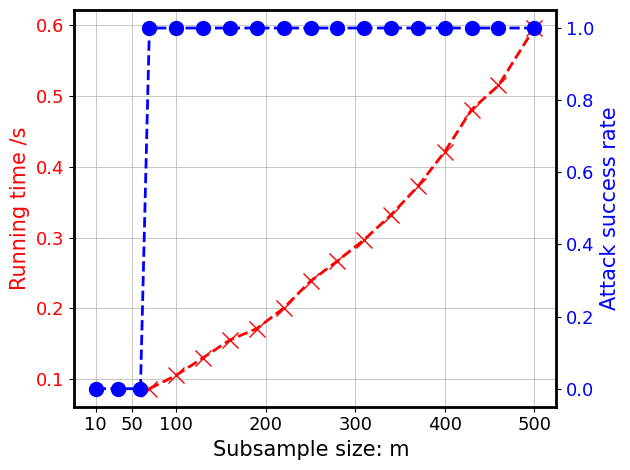

In [12]:
#multi

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()  # 创建一个figure和一个axes

x_values = [70+30*i for i in range(15)]
x_values[-1] = 500


multi_coef = [0 if i < 3 else 1 for i in range(18)]



marker_size = 11


# 绘制第一条线，使用ax1，这将使用左边的y轴
ax1.plot(x_values, multi, label='Multivariate attack', color='red', linestyle='--', marker='x', linewidth=2, markersize=marker_size)

ax1.tick_params(axis='y', labelcolor='red')
# 使用twinx创建第二个axes，共享相同的x轴
ax2 = ax1.twinx()  
ax2.plot(x_values_success, multi_coef, label='Secrets', color='blue', linestyle='--',marker='o', linewidth=2, markersize=marker_size-1)

ax2.set_ylabel('Attack success rate', color='blue',fontsize=15)
ax2.tick_params(axis='y', labelcolor='blue')

# Add grid lines
ax1.grid(True, which='both', linestyle='-', linewidth=0.5)
for spine in ax1.spines.values():
    spine.set_linewidth(2)
# Set axis labels
ax1.set_xlabel('Subsample size: m ', fontsize=15)
ax1.set_ylabel('Running time /s', fontsize=15, color='red')

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# 合并图例句柄和标签
handles = handles1 + handles2
labels = labels1 + labels2


ax1.set_xticks([10, 50,100,200,300,400,500])
ax1.tick_params(axis='both', labelsize=13)
ax2.tick_params(axis='both', labelsize=13)
plt.tight_layout()

# 保存为PDF格式
plt.savefig('./figure/true/purchase_multi.pdf', bbox_inches='tight')

# 保存为PNG格式
plt.savefig('./figure/true/purchase_multi.png', bbox_inches='tight')

plt.show()
